In [410]:
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image

In [411]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'train/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'test/',
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=1
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'train/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 895 files belonging to 2 classes.
Using 716 files for training.


Found 100 files belonging to 2 classes.
Using 90 files for training.
Found 895 files belonging to 2 classes.
Using 179 files for validation.


In [412]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

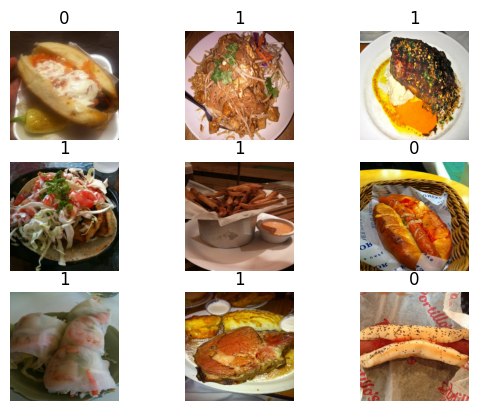

In [414]:
for i, (img, lbl) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(str(lbl[i].numpy()))
    plt.imshow(img[i].numpy().astype('uint8'));

In [415]:
# ok, 0 is hot-dog, 1 is not hot-dog

In [416]:
np.max(list(train_ds.take(1))[0][0].numpy())

255.0

In [417]:
def rescale(img, lbl):
    return img / 255.0, lbl

In [418]:
train_ds = train_ds.map(rescale)
test_ds = test_ds.map(rescale)
val_ds = val_ds.map(rescale)

In [419]:
np.max(list(train_ds.take(1))[0][0].numpy())

1.0

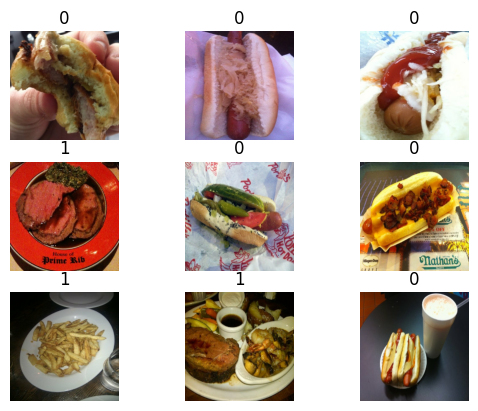

In [420]:
for i, (img, lbl) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(str(lbl[i].numpy()))
    plt.imshow(img[i]);

In [421]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [422]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(224, 224, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_61 (Dropout)        (None, 54, 54, 64)      

In [423]:
plateau_lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5
)

model_cp = ModelCheckpoint(
    'checkpoint_models/',
    monitor='val_loss',
    save_freq='epoch'
)

In [424]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

In [425]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [426]:
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    verbose=2,
    # callbacks=[model_cp, plateau_lr_reducer]
)

Epoch 1/100


23/23 - 17s - loss: 152.0794 - accuracy: 0.5237 - val_loss: 0.7057 - val_accuracy: 0.4804 - 17s/epoch - 738ms/step
Epoch 2/100
23/23 - 15s - loss: 0.7101 - accuracy: 0.4553 - val_loss: 0.6910 - val_accuracy: 0.5475 - 15s/epoch - 656ms/step
Epoch 3/100
23/23 - 15s - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6935 - val_accuracy: 0.4525 - 15s/epoch - 668ms/step
Epoch 4/100
23/23 - 15s - loss: 0.6927 - accuracy: 0.5140 - val_loss: 0.6956 - val_accuracy: 0.4525 - 15s/epoch - 669ms/step
Epoch 5/100
23/23 - 16s - loss: 0.6928 - accuracy: 0.5140 - val_loss: 0.6965 - val_accuracy: 0.4525 - 16s/epoch - 711ms/step
Epoch 6/100
23/23 - 16s - loss: 0.6929 - accuracy: 0.5140 - val_loss: 0.6967 - val_accuracy: 0.4525 - 16s/epoch - 676ms/step
Epoch 7/100
23/23 - 16s - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6967 - val_accuracy: 0.4525 - 16s/epoch - 685ms/step
Epoch 8/100
23/23 - 15s - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6967 - val_accuracy: 0.4525 - 15s/epoch - 671ms/step
Epoch 9/10

In [427]:
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [428]:
model.evaluate(test_ds)

90/90 [==============================] - 1s 11ms/step - loss: 0.6942 - accuracy: 0.4889


[0.694222629070282, 0.4888888895511627]